In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bc = pd.read_csv("data/Breast_Cancer.csv")

bc.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [2]:
bc.shape

(4024, 16)

In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [4]:
bc.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [5]:
bc.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

Text(0, 0.5, 'Survival Months')

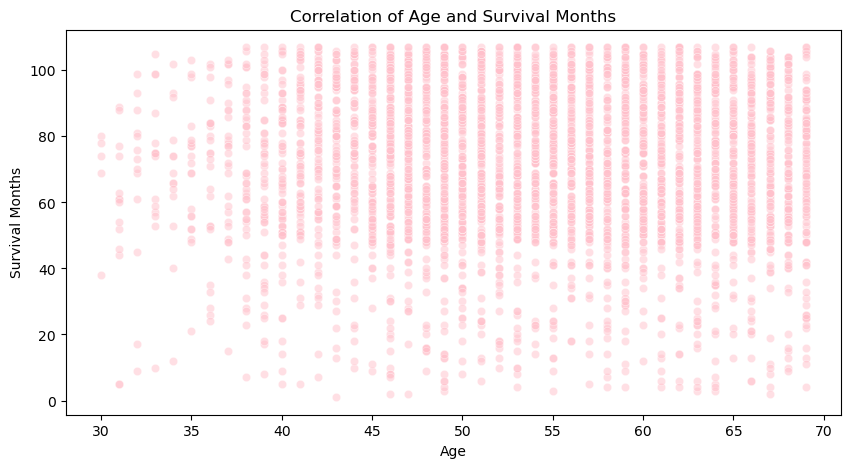

In [6]:
# Age vs Survival Months
# Investigate whether there’s a correlation between age at diagnosis and survival months.
# This could help identify if older patients tend to have shorter survival periods.

plt.figure(figsize = (10, 5))

sns.scatterplot(data = bc,
            x = "Age",
            y = "Survival Months",
            color = "pink",
            alpha = 0.5)

plt.title("Correlation of Age and Survival Months")
plt.xlabel("Age")
plt.ylabel("Survival Months")

The above scatterplot depicts the correlation between age at diagnosis and survival months. The data shows that most people are diagnosed after the age of 35 and most survive anywhere from 40 to 100 months after.

In [8]:
# Infected data, "T Stage" is unable to be found.

# T Stage vs Average Survival Months
# Examine how the T stage (size and extent of the tumor) relates to survival months.

# average_survival_t_stage = bc.groupby("T Stage")["Survival Months"].mean().reset_index()
# average_survival_t_stage.columns = ["T Stage", "Average Survival Months"]
# average_survival_t_stage

In [9]:
# N Stage vs Survival Months
# Analyze the impact of lymph node involvement on survival.
# More advanced N stages might correlate with shorter survival.

average_survival_n_stage = bc.groupby("N Stage")["Survival Months"].mean().reset_index()
average_survival_n_stage.columns = ["N Stage", "Average Survival Months"]
average_survival_n_stage

,N Stage,Average Survival Months
0,N1,73.169107
1,N2,69.714634
2,N3,63.218220


/var/folders/zv/92px_24j2bn8fgctpyk6lr2r0000gn/T/ipykernel_9787/2226298751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = bc,


Text(0.5, 0, 'N Stage')

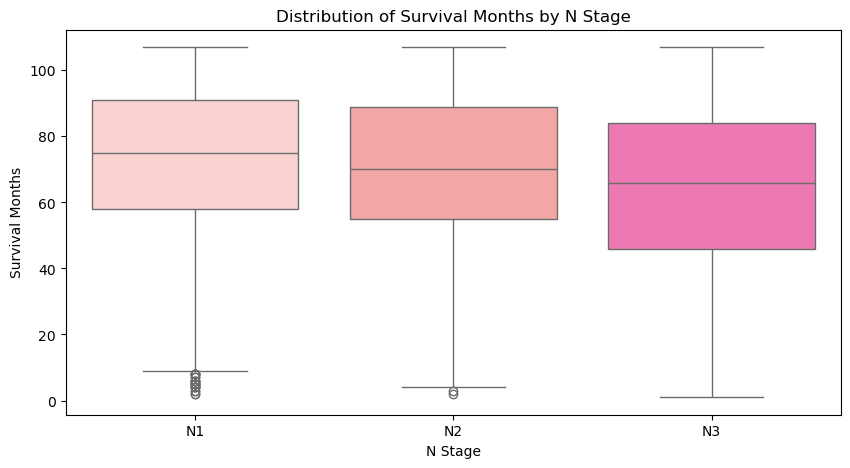

In [10]:
plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "N Stage",
            y = "Survival Months",
            palette = ["#ffcccb", "#ff9999", "#ff66b3"])

plt.title("Distribution of Survival Months by N Stage")
plt.xlabel("N Stage")

The above boxplot displays the distribution of survival months by N Stage. The average number of survival months decreases as the number of nodes infected and spread increases.

Text(0, 0.5, 'Survival Months')

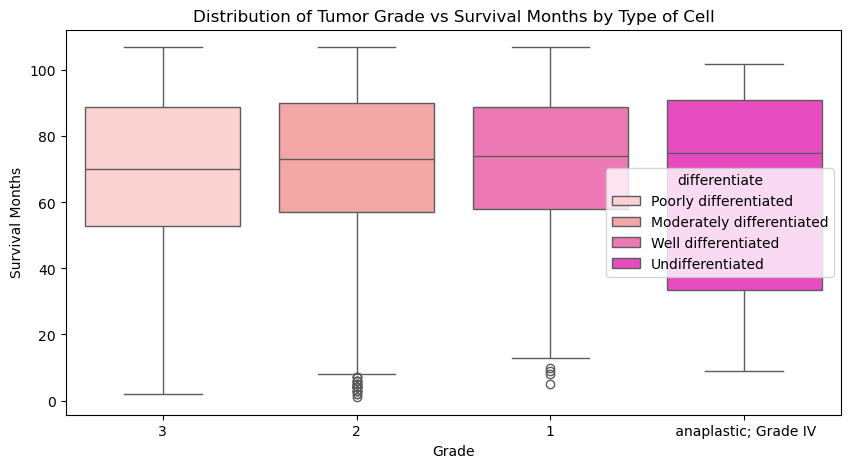

In [12]:
# Grade vs Differentiation
# Explore the relationship between tumor grade (well-differentiated vs. poorly differentiated) and survival outcomes.
# Poorly differentiated tumors may indicate worse prognoses.

plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "Grade",
            y = "Survival Months",
            hue = "differentiate",
            palette = ["#ffcccb", "#ff9999", "#ff66b3", "#ff33cc"])

plt.title("Distribution of Tumor Grade vs Survival Months by Type of Cell")
plt.xlabel("Grade")
plt.ylabel("Survival Months")

The above boxplot shows little to no difference between tumor grade in survival months between different types of cells.

Text(0, 0.5, 'Survival Months')

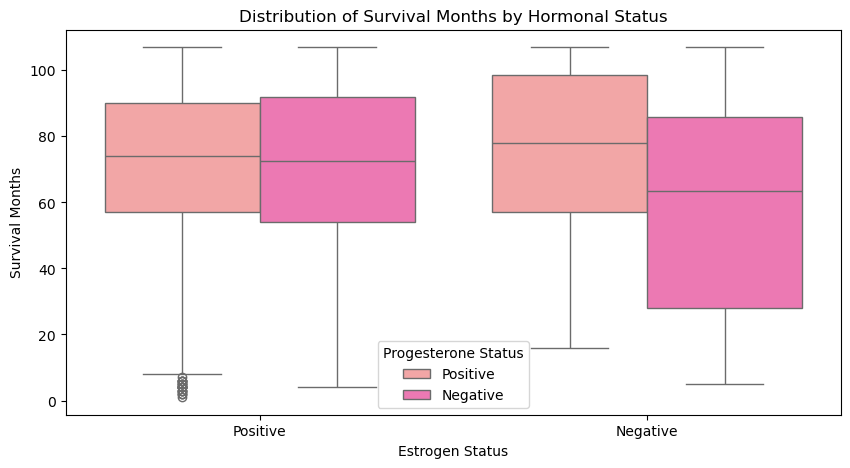

In [14]:
# Hormonal Status vs Survival
# Investigate the relationship between estrogen and progesterone receptor status (positive vs. negative) and survival months.
# Hormonal receptor status can influence treatment response and survival.

plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "Estrogen Status",
            y = "Survival Months",
            hue = "Progesterone Status",
            palette = ["#ff9999", "#ff66b3"])

plt.title("Distribution of Survival Months by Hormonal Status")
plt.xlabel("Estrogen Status")
plt.ylabel("Survival Months")

The above boxplot shows the distribution of survival months organized by hormonal status; negative estrogen and progesterone readings indicate an overall lower average in survival months.

Text(0, 0.5, 'Regional Nodes Positive')

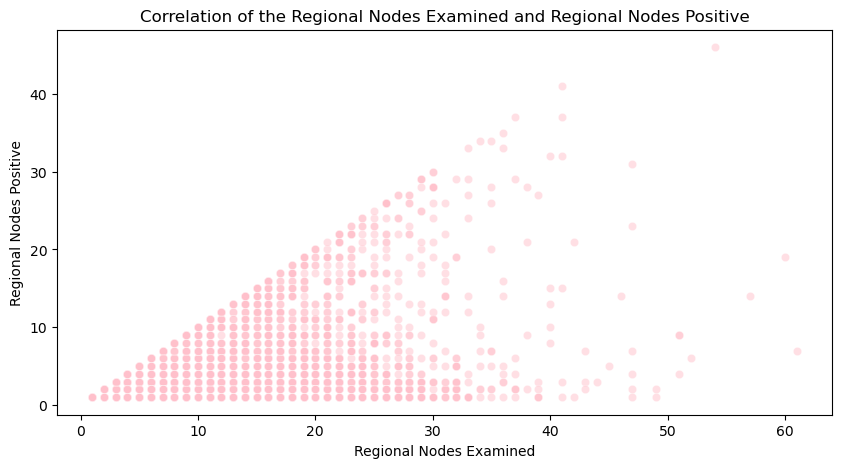

In [16]:
# Regional Node Examination and Positivity
# Analyze the number of regional nodes examined and whether positive nodes are associated with survival rates.

plt.figure(figsize = (10, 5))

sns.scatterplot(data = bc,
            x = "Regional Node Examined",
            y = "Reginol Node Positive",
            color = "pink",
            alpha = 0.5)

plt.title("Correlation of the Regional Nodes Examined and Regional Nodes Positive")
plt.xlabel("Regional Nodes Examined")
plt.ylabel("Regional Nodes Positive")

The scatterplot depicts a positive correlation between the amount of regional nodes examined and the amount of regional nodes found positive.

/var/folders/zv/92px_24j2bn8fgctpyk6lr2r0000gn/T/ipykernel_9787/2333050639.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = bc,


Text(0, 0.5, 'Survival Months')

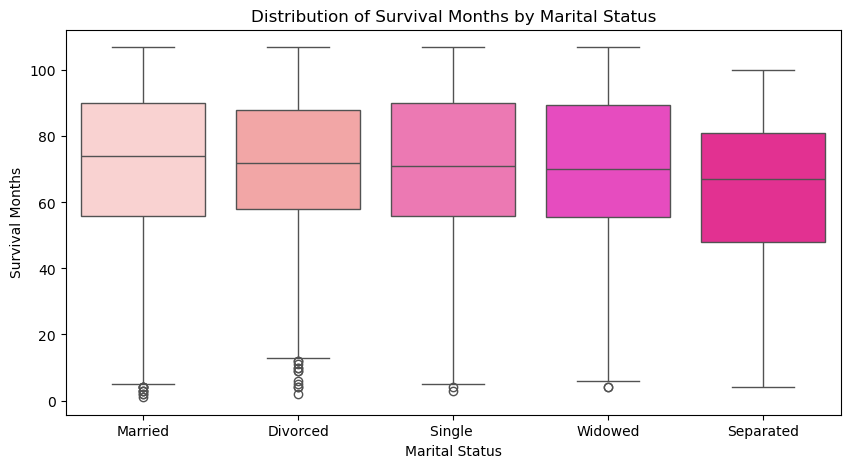

In [18]:
# Marital Status and Survival
# Explore whether marital status has any relationship with survival.
# It might be interesting to see if married patients have better support systems leading to longer survival.

plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "Marital Status",
            y = "Survival Months",
            palette = ["#ffcccb", "#ff9999", "#ff66b3", "#ff33cc", "#ff1493"])

plt.title("Distribution of Survival Months by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Survival Months")

Although the above boxplot shows similar averages for the different categories of marital status, being separated is associated with the lowest average in months of survival.

/var/folders/zv/92px_24j2bn8fgctpyk6lr2r0000gn/T/ipykernel_9787/2569996744.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = bc,


Text(0, 0.5, 'Survival Months')

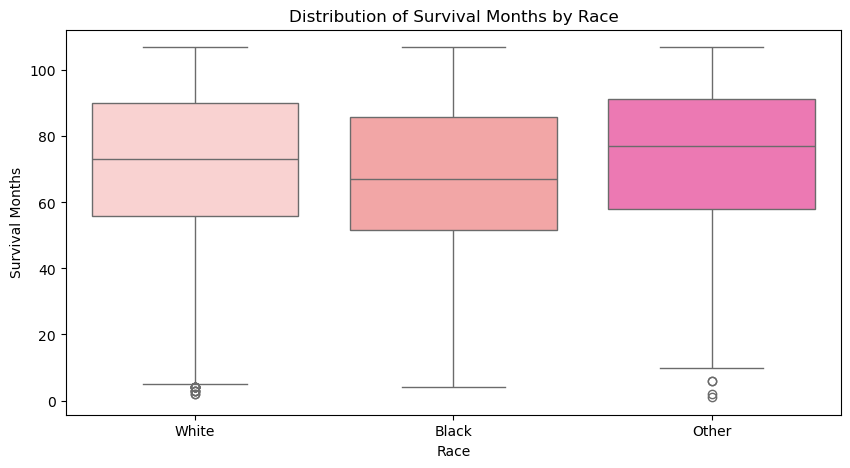

In [20]:
# Race and Survival
# Investigate if there are any significant differences in survival based on race, controlling for other factors like age, T stage, and hormonal status.

plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "Race",
            y = "Survival Months",
            palette = ["#ffcccb", "#ff9999", "#ff66b3"])

plt.title("Distribution of Survival Months by Race")
plt.xlabel("Race")
plt.ylabel("Survival Months")

The figure above shows side-by-side boxplots of the distribution of survival months by race. The "other" category has the highest average of survival months over "white" and "black."

In [22]:
# # Infected data, "T Stage" is unable to be found.

# Tumor Size and Stage
# Examine the relationship between tumor size and both T stage and overall cancer stage.
# Larger tumors may correspond to higher stages.

In [23]:
# Descriptive Statistics by Status
# Compare the means and distributions of survival months for patients who are alive vs. those who are deceased to see if there are noticeable trends.

average_survival = bc.groupby("Status")["Survival Months"].mean().reset_index()
average_survival.columns = ["Status", "Average Survival Months"]
average_survival

,Status,Average Survival Months
0,Alive,75.941021
1,Dead,45.610390


Text(0, 0.5, 'Tumor Size')

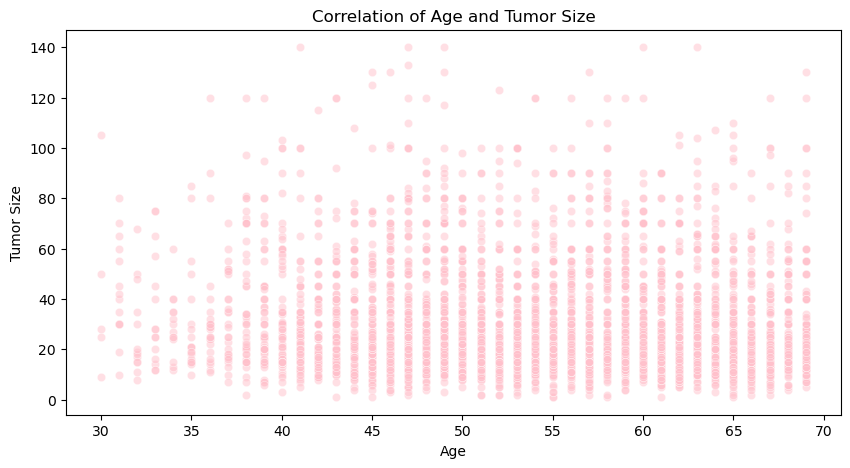

In [24]:
# Tumor Size vs Age

plt.figure(figsize = (10, 5))

sns.scatterplot(data = bc,
            x = "Age",
            y = "Tumor Size",
            color = "pink",
            alpha = 0.5)

plt.title("Correlation of Age and Tumor Size")
plt.xlabel("Age")
plt.ylabel("Tumor Size")

Most cases of breast cancer are found after the age of 35 and range from tumor sizes of 5 to 55.

Text(0, 0.5, 'Survival Months')

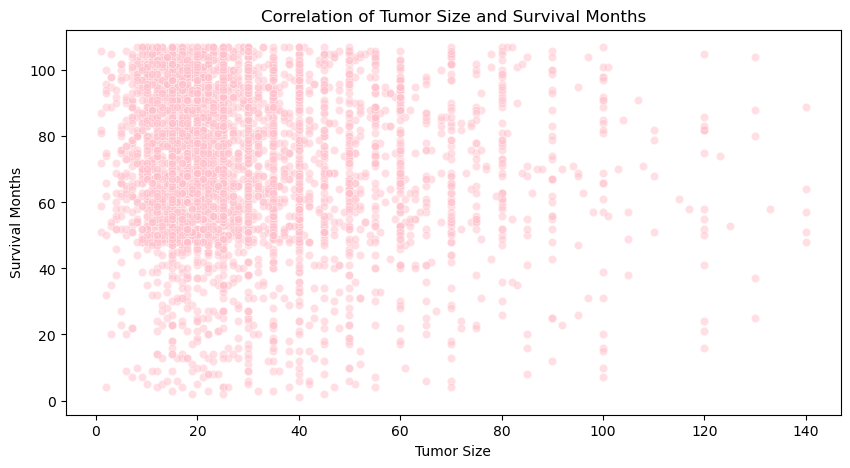

In [26]:
# Tumor Size vs Survival Months

plt.figure(figsize = (10, 5))

sns.scatterplot(data = bc,
            x = "Tumor Size",
            y = "Survival Months",
            color = "pink",
            alpha = 0.5)

plt.title("Correlation of Tumor Size and Survival Months")
plt.xlabel("Tumor Size")
plt.ylabel("Survival Months")

The above scatterplot shows a strong correlation between how small the tumor is, the higher amount of survival months a patient will have.

/var/folders/zv/92px_24j2bn8fgctpyk6lr2r0000gn/T/ipykernel_9787/1881206641.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = bc,


Text(0, 0.5, 'Regional Nodes Examined')

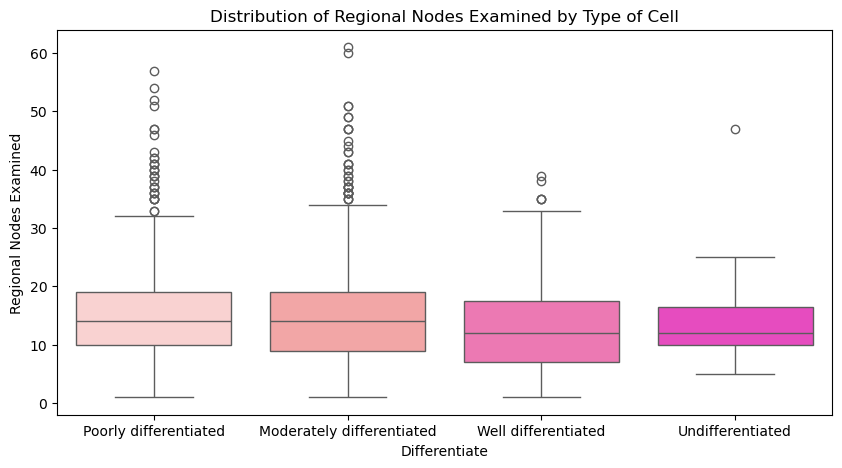

In [28]:
# Differentiate vs Regional Node Examined
# If cells are not well differentiated, it is difficult to tell how far the cancer has spread.

plt.figure(figsize = (10, 5))

sns.boxplot(data = bc,
            x = "differentiate",
            y = "Regional Node Examined",
            palette = ["#ffcccb", "#ff9999", "#ff66b3", "#ff33cc"])

plt.title("Distribution of Regional Nodes Examined by Type of Cell")
plt.xlabel("Differentiate")
plt.ylabel("Regional Nodes Examined")

The side-by-side boxplots show the distribution of regional nodes examined by type of cell. The amount of regional nodes examined decreases as the ability to differentiate between cells increases.